# 图像特效-素描

In [10]:
from scipy import signal
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.lib.function_base import histogram

In [11]:
src = cv2.imread('../datas/face2.jpg')
gray = cv2.imread('../datas/face2.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

In [12]:
def sketch(src):
    kernel = np.array([
        [-1,-1,-1],
        [-1,8,-1],
        [-1,-1,-1]
    ])
    srcf = src.astype(np.float32)
    if len(src.shape) < 3:
        srcf = cv2.cvtColor(src,cv2.COLOR_GRAY2RGB).astype(np.float32)
    srcf = cv2.cvtColor(srcf,cv2.COLOR_RGB2GRAY)
    dst =  signal.convolve2d(srcf,kernel, boundary='symm', mode='same')
#     dstg =  signal.convolve2d(srcf[:,:,1],kernel, boundary='symm', mode='same')
#     dstb =  signal.convolve2d(srcf[:,:,2],kernel, boundary='symm', mode='same')
#     dst = cv2.merge([dstr,dstg,dstb])
    element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
    #膨胀图像    
    dst = cv2.dilate(dst,element) 
    dst = cv2.GaussianBlur(dst,(3,3),1.5)
    dst[dst > 255] = 255
    dst[dst < 0] = 0
    return dst.astype(np.uint8)

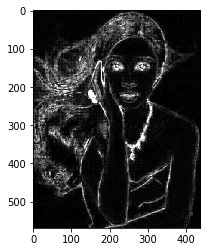

In [13]:
dst = sketch(src)
plt.imshow(dst,'gray')

In [20]:
def sketch2(src):
    srcf = np.float32(src)
    if len(src.shape) < 3:
        srcf = cv2.cvtColor(src,cv2.COLOR_GRAY2RGB).astype(np.float32)
    dst = np.zeros_like(srcf)
    rows,cols = srcf.shape[0],srcf.shape[1]
    gray =cv2.cvtColor(src,cv2.COLOR_RGB2GRAY).astype(np.float32)
    gauss = cv2.GaussianBlur(srcf,(7,7),2.4,2.4)
    graygauss = 255.0 - (gauss[:,:,0] + gauss[:,:,1] + gauss[:,:,2]) / 3.0
    
    dst[:,:,0] = gray + (gray * graygauss) / (255 - graygauss + 1.0e-5)
    dst[:,:,1] = gray + (gray * graygauss) / (255 - graygauss + 1.0e-5)
    dst[:,:,2] = gray + (gray * graygauss) / (255 - graygauss + 1.0e-5)

    dst = np.clip(dst,0,255)
    return np.uint8(dst)

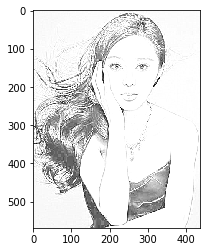

In [21]:
dst = sketch2(rgb)
plt.imshow(dst)